                                            Samuele Piccinelli, 2027650

# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2027650
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 63 58 51 63 63 65 64 51 67]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [55 63 58 51 63 63 65 64 51 67]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


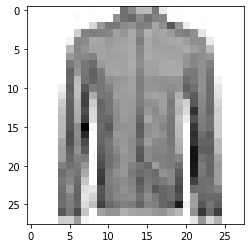

LABEL: 6
INPUT:


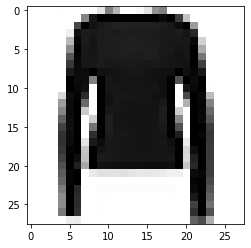

LABEL: 2
INPUT:


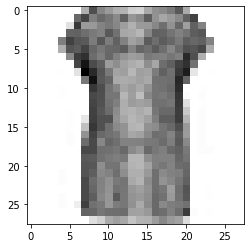

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (40,30,), (50,40,), (30,30,20), (50,30,10), (40,30,10), (30,20,10)]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

res = GridSearchCV(param_grid = parameters, estimator = mlp, cv = 5)
res.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=250,
                                     random_state=2027650, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(10,), (20,), (30,), (50,),
                                                (40, 30), (50, 40),
                                                (30, 30, 20), (50, 30, 10),
                                                (40, 30, 10), (30, 20, 10)]})

RESULTS FOR NN: hidden layers

Best parameters set found: {'hidden_layer_sizes': (50,)}
Score with best parameters: 0.76667

All scores on the grid: 

Mean test score for (10,): 0.70167 +/- 0.039581
Mean test score for (20,): 0.745 +/- 0.026141
Mean test score for (30,): 0.74833 +/- 0.021985
Mean test score for (50,): 0.76667 +/- 0.033333
Mean test score for (40, 30): 0.75167 +/- 0.035512
Mean test score for (50, 40): 0.75 +/- 0.043141
Mean test score for (30, 30, 20): 0.58667 +/- 0.24075
Mean test score for (50, 30, 10): 0.52333 +/- 0.18495
Mean test score for (40, 30, 10): 0.475 +/- 0.22503
Mean test score for (30, 20, 10): 0.285 +/- 0.18374


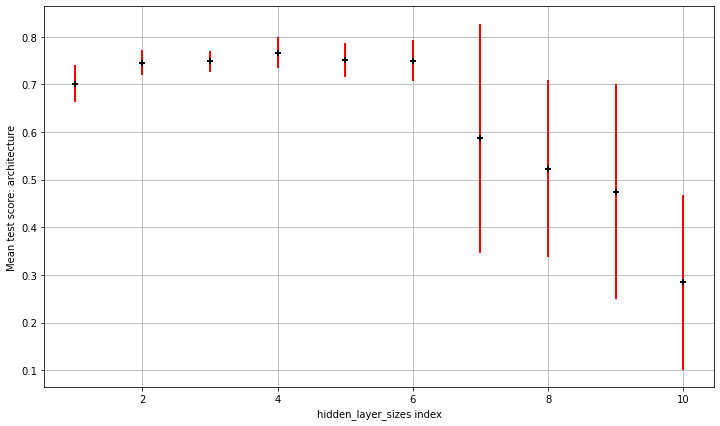

In [9]:
print ('RESULTS FOR NN: hidden layers\n')

print("Best parameters set found: {}".format(res.best_params_))
print("Score with best parameters: {:.5}".format(res.best_score_))
print("\nAll scores on the grid: \n")
plt.figure(figsize = (12, 7))
plt.grid(True)
plt.ylabel("Mean test score: architecture")
plt.xlabel("hidden_layer_sizes index")
x_values = np.arange(1, len(parameters['hidden_layer_sizes'])+1)
for i, mean, std in zip(parameters['hidden_layer_sizes'], res.cv_results_['mean_test_score'], res.cv_results_['std_test_score']):
    print("Mean test score for {}: {:.5} +/- {:.5}".format(i, mean, std))
    plt.errorbar(x_values, res.cv_results_['mean_test_score'], res.cv_results_['std_test_score'],
                 fmt='+', color='black', ecolor='red', elinewidth=2, capsize=0, markeredgewidth=2)

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [8, 15, 16, 20, 24, 30, 32, 40, 48, 60, 80, 96, 120, 160, 240,]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(hidden_layer_sizes = res.best_params_['hidden_layer_sizes'], max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, learning_rate_init=.1)
res_batch = GridSearchCV(mlp, param_grid = {'batch_size': parameters['batch_size']}, cv = kf)
res_batch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(hidden_layer_sizes=(50,),
                                     learning_rate_init=0.1, max_iter=250,
                                     random_state=2027650, solver='sgd'),
             param_grid={'batch_size': [8, 15, 16, 20, 24, 30, 32, 40, 48, 60,
                                        80, 96, 120, 160, 240]})

RESULTS FOR NN: batch size

Best parameters set found: {'batch_size': 80}
Score with best parameters: 0.76667

All scores on the grid: 

Mean test score for 8: 0.135 +/- 0.024381
Mean test score for 15: 0.41 +/- 0.06675
Mean test score for 16: 0.50667 +/- 0.027588
Mean test score for 20: 0.6 +/- 0.048591
Mean test score for 24: 0.68167 +/- 0.033082
Mean test score for 30: 0.73833 +/- 0.038944
Mean test score for 32: 0.70833 +/- 0.042492
Mean test score for 40: 0.75333 +/- 0.027183
Mean test score for 48: 0.745 +/- 0.031002
Mean test score for 60: 0.74833 +/- 0.042947
Mean test score for 80: 0.76667 +/- 0.034561
Mean test score for 96: 0.76167 +/- 0.031885
Mean test score for 120: 0.755 +/- 0.026141
Mean test score for 160: 0.76667 +/- 0.029345
Mean test score for 240: 0.76 +/- 0.022608


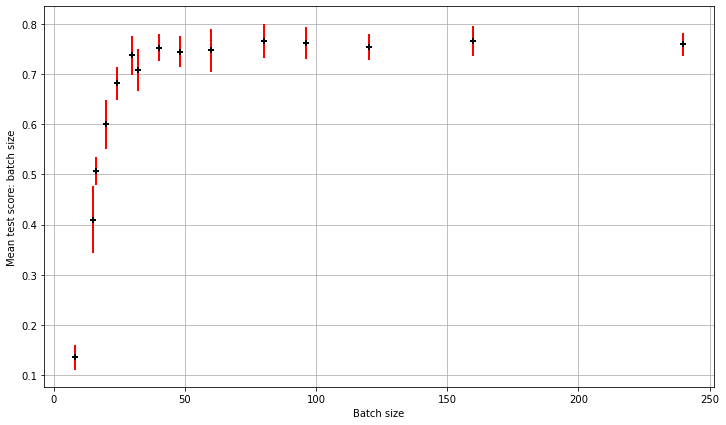

In [11]:
print ('RESULTS FOR NN: batch size\n')

print("Best parameters set found: {}".format(res_batch.best_params_))
print("Score with best parameters: {:.5}".format(res_batch.best_score_))
print("\nAll scores on the grid: \n")
plt.figure(figsize = (12, 7))
plt.grid(True)
plt.ylabel("Mean test score: batch size")
plt.xlabel("Batch size")
for i, mean, std in zip(parameters['batch_size'], res_batch.cv_results_['mean_test_score'], res_batch.cv_results_['std_test_score']):
    print("Mean test score for {}: {:.5} +/- {:.5}".format(i, mean, std))
    plt.errorbar(parameters['batch_size'], res_batch.cv_results_['mean_test_score'], res_batch.cv_results_['std_test_score'],
                 fmt='+', color='black', ecolor='red', elinewidth=2, capsize=0, markeredgewidth=2)

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

By changing the architecture of the network, the performance of the classification is not majorly affected and remains around $\sim75\%$, even though a best value can be outlined. When the number of hidden layers is $=3$ the performance drops, reaching values around $\sim30\%$ for the ones with the smallest number of neurons per hidden layer.

The batch sizes has a great impact on the performances: from the plot it is clear to see how for small batches sizes ($<30$) the algorithm does not converge. Once that certain threshold is passed the performances improve significantly and saturate around $74/76\%$.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 3.04 sec

Training MLP of size (20,) ...
Done, training time: 0.90 sec

Training MLP of size (30,) ...
Done, training time: 3.14 sec

Training MLP of size (50,) ...
Done, training time: 3.31 sec

Training MLP of size (40, 30) ...
Done, training time: 1.08 sec

Training MLP of size (50, 40) ...
Done, training time: 2.52 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 1.05 sec

Training MLP of size (50, 30, 10) ...
Done, training time: 2.25 sec

Training MLP of size (40, 30, 10) ...
Done, training time: 1.66 sec

Training MLP of size (30, 20, 10) ...
Done, training time: 1.06 sec



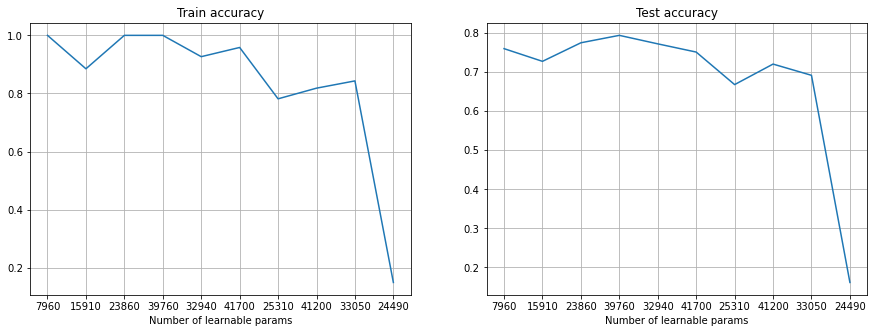

In [12]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (50,), (40,30,), (50,40,), (30,30,20), (50,30,10), (40,30,10), (30,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes = hl_size, batch_size = res_batch.best_params_['batch_size'],
                        max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)
    mlp.fit(X_train, y_train)
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

Both curves follow the same trend: with the increase of the number of learnable parameters, both test and train accuracy, after a constant section, drop significantly. The train accuracy remains always higher than the training one by roughly a decimal point. The model is not overfitting since the inequality $\varepsilon_{train} \ll \varepsilon_{test}$ does not hold, i.e there's no large difference between the test and train accuracy and the found model generalises successfully.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [13]:
import matplotlib.pyplot as plt
import operator
import warnings

warnings.filterwarnings('ignore')
lr_list = [10**exp for exp in range(-4,0)]
scores = {'learning_rate_init': lr_list}

mlp = MLPClassifier(hidden_layer_sizes = res.best_params_['hidden_layer_sizes'],
                    batch_size = res_batch.best_params_['batch_size'], max_iter=600,
                    alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID)
lr_NN = GridSearchCV(mlp, param_grid = scores, cv = kf)
lr_NN.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(batch_size=80, hidden_layer_sizes=(50,),
                                     max_iter=600, random_state=2027650,
                                     solver='sgd'),
             param_grid={'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]})

RESULTS FOR NN: learning rate

Best parameters set found: {'learning_rate_init': 0.001}
Score with best parameters: 0.76667

All scores on the grid: 

Mean test score for 0.0001: 0.7 +/- 0.045031
Mean test score for 0.001: 0.76667 +/- 0.03118
Mean test score for 0.01: 0.75833 +/- 0.02357
Mean test score for 0.1: 0.76667 +/- 0.034561


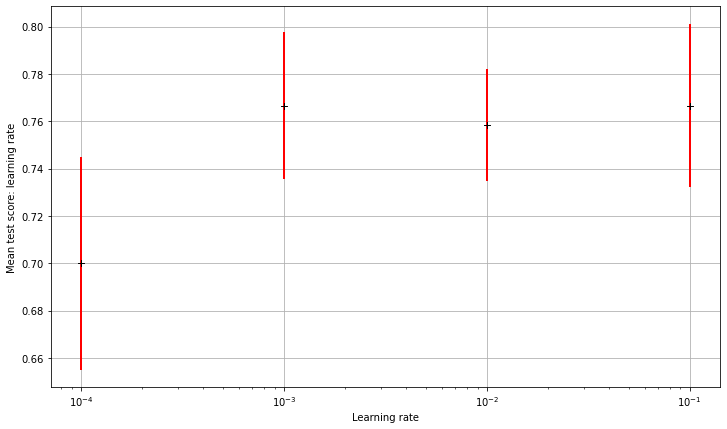

In [14]:
print ('RESULTS FOR NN: learning rate\n')

print("Best parameters set found: {}".format(lr_NN.best_params_))
print("Score with best parameters: {:.5}".format(lr_NN.best_score_))
print("\nAll scores on the grid: \n")
plt.figure(figsize = (12, 7))
plt.grid(True)
plt.xscale('log')
plt.ylabel("Mean test score: learning rate")
plt.xlabel("Learning rate")
for i, mean, std in zip(lr_list, lr_NN.cv_results_['mean_test_score'], lr_NN.cv_results_['std_test_score']):
    print("Mean test score for {}: {:.5} +/- {:.5}".format(i, mean, std))
    plt.errorbar(lr_list, lr_NN.cv_results_['mean_test_score'], lr_NN.cv_results_['std_test_score'],
                 fmt='+', color='black', ecolor='red', elinewidth=2, capsize=0)

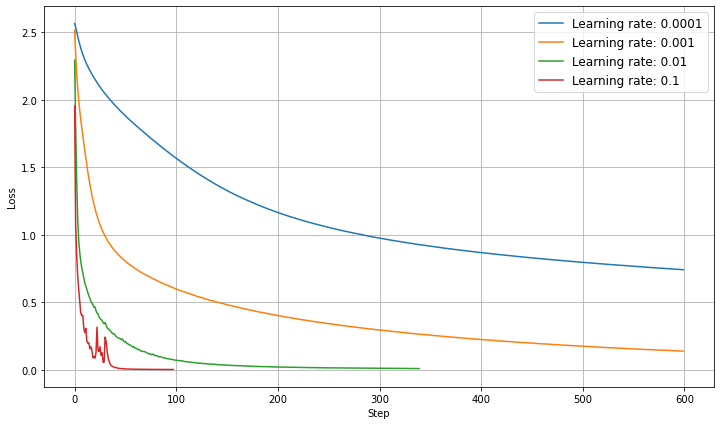

In [15]:
plt.figure(figsize = (12, 7))
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Step")
for lr in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes = res.best_params_['hidden_layer_sizes'],
                    batch_size = res_batch.best_params_['batch_size'], max_iter=600,
                    alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr)
    mlp.fit(X_train, y_train)
    plt.plot(mlp.loss_curve_, label="Learning rate: " + str(lr))
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

By increasing the learning rate, less iterations are required to reach convergence. For the highest considered value, the shape of the loss curve is steeper but noisier: the algorithm is thus faster but more unstable. On the other hand, the lowest value of learning rate is more stable but requires a much longer time to converge.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.

In [16]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(hidden_layer_sizes = res.best_params_['hidden_layer_sizes'],
                    batch_size = res_batch.best_params_['batch_size'], max_iter=600,
                    alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=lr_NN.best_params_['learning_rate_init'])
best_mlp.fit(X_train, y_train)

training_error = 1. - best_mlp.score(X_train, y_train)
test_error = 1. - best_mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.010000
Best NN test error: 0.201000


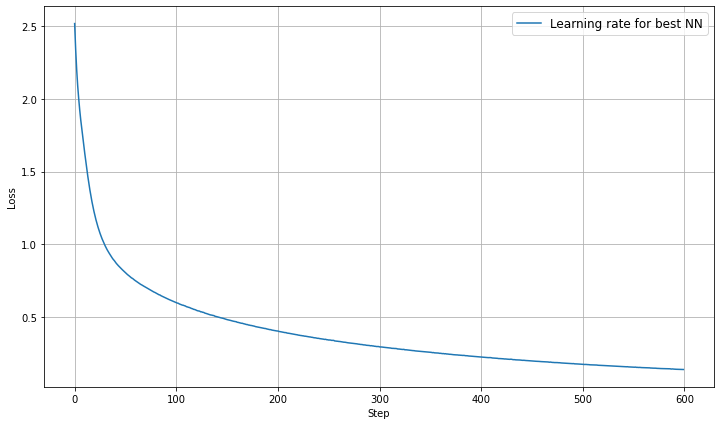

In [17]:
plt.figure(figsize = (12, 7))
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Step")
plt.plot(best_mlp.loss_curve_, label="Learning rate for best NN")
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [18]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [397 410 411 376 384 379 414 430 383 416]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [19]:
# use best architecture and params from before

best_mlp_4e3 = MLPClassifier(hidden_layer_sizes = res.best_params_['hidden_layer_sizes'],
                    batch_size = res_batch.best_params_['batch_size'], max_iter=600,
                    alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=lr_NN.best_params_['learning_rate_init'], verbose = True)
best_mlp_4e3.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1. - best_mlp_4e3.score(X_train, y_train)
test_error = 1. - best_mlp_4e3.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

Iteration 1, loss = 2.18115175
Iteration 2, loss = 1.71347734
Iteration 3, loss = 1.39200093
Iteration 4, loss = 1.18160430
Iteration 5, loss = 1.05631900
Iteration 6, loss = 0.97648636
Iteration 7, loss = 0.91912217
Iteration 8, loss = 0.87523430
Iteration 9, loss = 0.84079430
Iteration 10, loss = 0.81270885
Iteration 11, loss = 0.78845526
Iteration 12, loss = 0.76756669
Iteration 13, loss = 0.74964336
Iteration 14, loss = 0.73201543
Iteration 15, loss = 0.71653289
Iteration 16, loss = 0.70234548
Iteration 17, loss = 0.69090228
Iteration 18, loss = 0.67799841
Iteration 19, loss = 0.66846362
Iteration 20, loss = 0.65654717
Iteration 21, loss = 0.64861979
Iteration 22, loss = 0.64023372
Iteration 23, loss = 0.63094581
Iteration 24, loss = 0.62296294
Iteration 25, loss = 0.61588508
Iteration 26, loss = 0.60824840
Iteration 27, loss = 0.60228697
Iteration 28, loss = 0.59527170
Iteration 29, loss = 0.58973008
Iteration 30, loss = 0.58347249
Iteration 31, loss = 0.57720463
Iteration 32, los

Iteration 253, loss = 0.27689509
Iteration 254, loss = 0.27598154
Iteration 255, loss = 0.27536798
Iteration 256, loss = 0.27475755
Iteration 257, loss = 0.27384201
Iteration 258, loss = 0.27404705
Iteration 259, loss = 0.27324099
Iteration 260, loss = 0.27190486
Iteration 261, loss = 0.27196388
Iteration 262, loss = 0.27178185
Iteration 263, loss = 0.27088518
Iteration 264, loss = 0.27026175
Iteration 265, loss = 0.26970928
Iteration 266, loss = 0.26804257
Iteration 267, loss = 0.27127957
Iteration 268, loss = 0.26685437
Iteration 269, loss = 0.26712350
Iteration 270, loss = 0.26591440
Iteration 271, loss = 0.26592197
Iteration 272, loss = 0.26675433
Iteration 273, loss = 0.26344087
Iteration 274, loss = 0.26473119
Iteration 275, loss = 0.26288733
Iteration 276, loss = 0.26180875
Iteration 277, loss = 0.26068665
Iteration 278, loss = 0.26115939
Iteration 279, loss = 0.26201736
Iteration 280, loss = 0.25993250
Iteration 281, loss = 0.25908646
Iteration 282, loss = 0.25900748
Iteration 

Iteration 502, loss = 0.15733370
Iteration 503, loss = 0.15957924
Iteration 504, loss = 0.15824293
Iteration 505, loss = 0.15699475
Iteration 506, loss = 0.15554132
Iteration 507, loss = 0.15573487
Iteration 508, loss = 0.15466264
Iteration 509, loss = 0.15597089
Iteration 510, loss = 0.15470666
Iteration 511, loss = 0.15532357
Iteration 512, loss = 0.15409921
Iteration 513, loss = 0.15440841
Iteration 514, loss = 0.15426419
Iteration 515, loss = 0.15316839
Iteration 516, loss = 0.15351957
Iteration 517, loss = 0.15393549
Iteration 518, loss = 0.15315888
Iteration 519, loss = 0.15203891
Iteration 520, loss = 0.15206641
Iteration 521, loss = 0.15154252
Iteration 522, loss = 0.15130424
Iteration 523, loss = 0.15163407
Iteration 524, loss = 0.15121030
Iteration 525, loss = 0.15003017
Iteration 526, loss = 0.15075135
Iteration 527, loss = 0.15006257
Iteration 528, loss = 0.15023483
Iteration 529, loss = 0.14983534
Iteration 530, loss = 0.14880003
Iteration 531, loss = 0.14864252
Iteration 

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

By increasing the size of the dataset the training error increases while the test error decreases. The lower value for the training error in the case with less training samples is most likely caused by overfitting: increasing the dataset allows to have better perfomances on the test set and thus leads to a more performing model, as expected.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

In [20]:
NN_prediction = best_mlp.predict(X_test) #predictions on the test set
large_NN_prediction = best_mlp_4e3.predict(X_test)

INPUT:


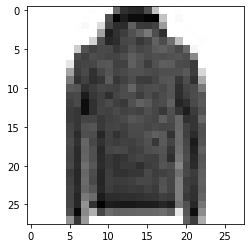

LABEL: 2


In [21]:
first = True

for i in range(m_training):
    if NN_prediction[i] != y_test[i] and large_NN_prediction[i] == y_test[i]:
        if first:
            plot_input(X_test,y_test,i)
            first = False

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


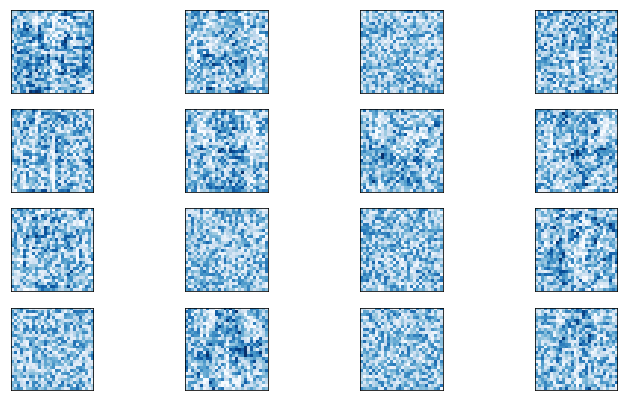

Weights with 4000 data points:


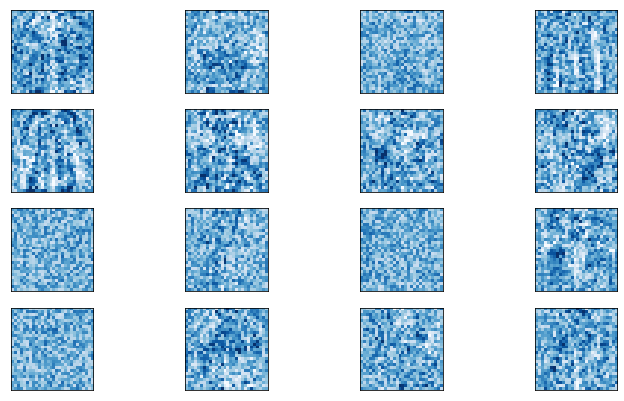

In [22]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(12, 7))
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap='Blues', vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(12, 7))
vmin, vmax = best_mlp_4e3.coefs_[0].min(), best_mlp_4e3.coefs_[0].max()
for coef, ax in zip(best_mlp_4e3.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap='Blues', vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

The plot shows the weight of the one and only layer of the network, i.e. the strength of each element (a single pixel) in input.
What can be observed is that some of the squares plotted show clothes-shaped patterns, while others remain fuzzy, appearing like grey boxes. The ones without a recognizable pattern are those whose spatial features are not particularly exploited: with a bigger dataset, some of this connections are more highlighted than others.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [23]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_SVM = GridSearchCV(SVC(kernel = 'rbf', random_state = ID), param_grid = {'C': [50],'gamma':[0.005]}, cv = 4)
best_SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - best_SVM.score(X_train,y_train)
SVM_test_error = best_SVM.score(X_test,y_test)

print ("Training score SVM: %f" % training_error)
print ("Test score SVM: %f" % test_error)

RESULTS FOR SVM
Training score SVM: 0.029500
Test score SVM: 0.160661


In [24]:
from sklearn.linear_model import LogisticRegression

regL2 = LogisticRegression(random_state = ID, max_iter = 1e6) #C = 1 by default
regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1. - regL2.score(X_train,y_train)
test_error = 1. - regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.049800
Test error (reg): 0.170000


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

The results obtained with Support Vector Machine and Neural Network are very close to each other. Neural Network shows for both the test and the train set a lower error value wrt the Logistic Regression method.
The bigger training error that comes up by using LR comes from the fact that more error on the training set is allowed in order to avoid overfitting.
For the case of a bigger dataset, Neural Network is more suitable and provides the best results: to exploit it to its full potential one could search its optimal parameters through a fine-tuning process.